# Importing required dependencies

In [127]:
import pandas as pd
from datetime import timedelta
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Reading the data into data frame

In [128]:
df = pd.read_csv('https://gps-london.s3.eu-west-2.amazonaws.com/gps.csv')

In [129]:
df.tail(15)

,user_id,datetime,lat,lon
1769996,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 09:59:05+00:00,51.502536,-0.083010
1769997,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:01:39+00:00,51.504117,-0.084738
1769998,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:02:47+00:00,51.504089,-0.084900
1769999,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:03:12+00:00,51.504089,-0.084900
1770000,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:07:48+00:00,51.503869,-0.097309
1770001,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:08:12+00:00,51.503869,-0.097309
1770002,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:08:40+00:00,51.504561,-0.106072
1770003,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:11:45+00:00,51.504208,-0.114535
1770004,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:12:12+00:00,51.504208,-0.114535
1770005,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 10:12:26+00:00,51.504208,-0.114535


# Exploratory analysis

In [130]:
len(df)

1770011

In [131]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770011 entries, 0 to 1770010
Data columns (total 4 columns):
 #   Column    Dtype              
---  ------    -----              
 0   user_id   object             
 1   datetime  datetime64[ns, UTC]
 2   lat       float64            
 3   lon       float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(1)
memory usage: 54.0+ MB


In [133]:
df.isna()

,user_id,datetime,lat,lon
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1770006,False,False,False,False
1770007,False,False,False,False
1770008,False,False,False,False
1770009,False,False,False,False


In [134]:
df.describe()

,lat,lon
count,1.770011e+06,1.770011e+06
mean,5.149896e+01,-9.836186e-02
std,6.002999e-03,1.186196e-02
min,5.148249e+01,-1.213403e-01
25%,5.149463e+01,-1.088844e-01
50%,5.150077e+01,-9.862888e-02
75%,5.150407e+01,-8.793030e-02
max,5.150664e+01,-7.640790e-02


In [135]:
len(df['user_id'].value_counts())

31606

# Distribution of latitude

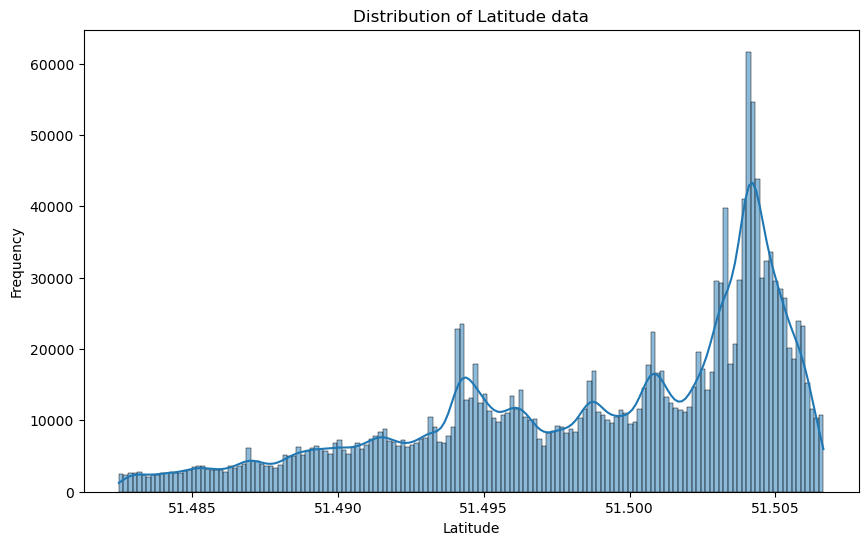

In [136]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lat'], kde=True)  # `kde` adds a Kernel Density Estimate plot
plt.title('Distribution of Latitude data')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.show()

# Distribution of longitude

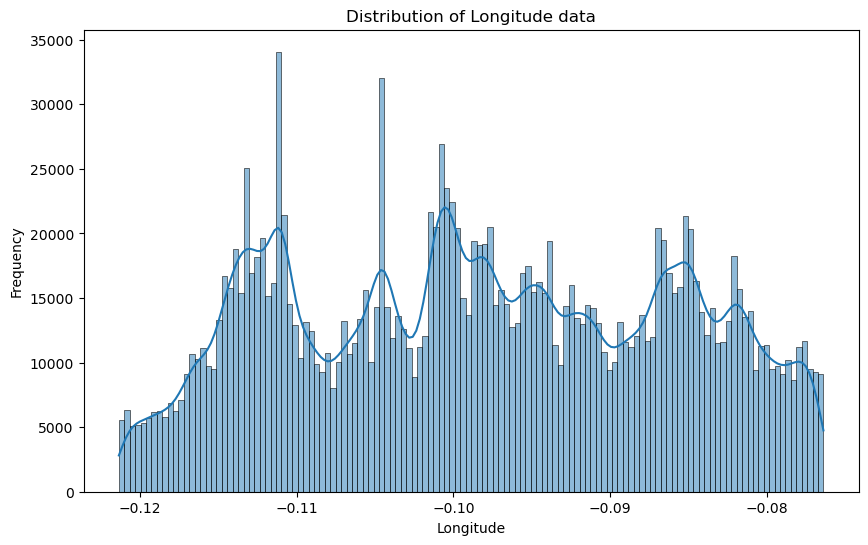

In [137]:
plt.figure(figsize=(10, 6))
sns.histplot(df['lon'], kde=True)  # `kde` adds a Kernel Density Estimate plot
plt.title('Distribution of Longitude data')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

In [138]:
df

,user_id,datetime,lat,lon
0,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:49:29+00:00,51.504017,-0.086455
1,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:01+00:00,51.505192,-0.090741
2,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:32+00:00,51.504098,-0.095321
3,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:55:55+00:00,51.504084,-0.109144
4,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:58:01+00:00,51.504191,-0.113367
...,...,...,...,...
1770006,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:31:19+00:00,51.504983,-0.116347
1770007,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:32:21+00:00,51.504162,-0.108317
1770008,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:34:29+00:00,51.504318,-0.107971
1770009,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:35:34+00:00,51.503990,-0.099953


# Extracting features like day, hours and seconds from datetime

In [140]:
# Extracting features from date time
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [141]:
df

,user_id,datetime,lat,lon,day,hour,minute,second
0,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:49:29+00:00,51.504017,-0.086455,9,8,49,29
1,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:01+00:00,51.505192,-0.090741,9,8,52,1
2,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:52:32+00:00,51.504098,-0.095321,9,8,52,32
3,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:55:55+00:00,51.504084,-0.109144,9,8,55,55
4,00F70625-4B30-4B4F-A0E3-A5CD9474E34F,2018-01-09 08:58:01+00:00,51.504191,-0.113367,9,8,58,1
...,...,...,...,...,...,...,...,...
1770006,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:31:19+00:00,51.504983,-0.116347,18,19,31,19
1770007,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:32:21+00:00,51.504162,-0.108317,18,19,32,21
1770008,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:34:29+00:00,51.504318,-0.107971,18,19,34,29
1770009,ff2bc06a-df27-48f8-9177-3a36ef4a8887,2018-01-18 19:35:34+00:00,51.503990,-0.099953,18,19,35,34


In [142]:
df['day'].value_counts()

11    189839
10    185832
18    184309
17    182964
16    181855
9     178371
12    176933
19    173990
15    164899
8     151019
Name: day, dtype: int64

# Distribution of days

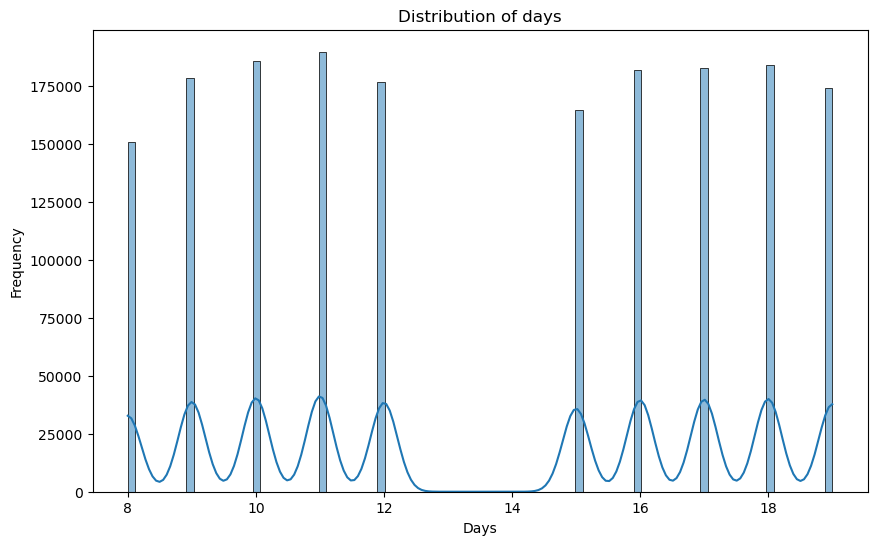

In [143]:
plt.figure(figsize=(10, 6))
sns.histplot(df['day'], kde=True)  # `kde` adds a Kernel Density Estimate plot
plt.title('Distribution of days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Distribution of hours

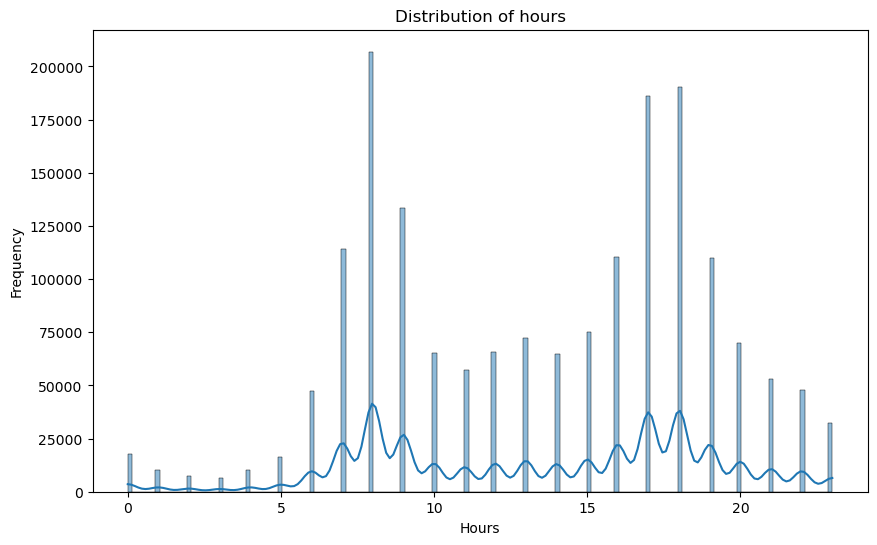

In [144]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], kde=True)  # `kde` adds a Kernel Density Estimate plot
plt.title('Distribution of hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

# Calculating distance between two latitude & longitude pairs

In [145]:
def haversine(lat1, lon1, lat2, lon2):
    
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)
    
    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    #Converting unit from kilometers to meters
    distance = distance*1000
    
    return distance

In [146]:
# Define minimum duration and spatial threshold
min_duration = timedelta(minutes=5)  # 15 minutes in seconds
spatial_threshold = 10  # meters

In [147]:
# Sort data and group by user
df = df.sort_values(by=["user_id", "datetime"])
grouped_data = df.groupby("user_id")

# Calculating indivudual dwells based on time and distance conditions

NOTE: The 'identify_dwells()' function is taking some time for calculation and is having O(n) time complexity hence room for improvement to O(lon(n))

In [148]:
# Function to identify dwells for each user
def identify_dwells(group):
    dwells = []
    dwell_start = group["datetime"].iloc[0]
    for i in range(1, len(group)):
        prev_time = group["datetime"].iloc[i-1]
        curr_time = group["datetime"].iloc[i]
        time_diff = curr_time - prev_time
        if (time_diff < min_duration) and (haversine(group["lat"].iloc[i], group["lon"].iloc[i], group["lat"].iloc[i-1], group["lon"].iloc[i-1])) > spatial_threshold:
            continue
        elif (time_diff >= min_duration) or (haversine(group["lat"].iloc[i], group["lon"].iloc[i], group["lat"].iloc[i-1], group["lon"].iloc[i-1])) > spatial_threshold:
            dwells.append({
                "user_id": group["user_id"].iloc[0],
                "datetime": dwell_start,
                "lat": group["lat"].iloc[i-1],
                "lon": group["lon"].iloc[i-1],
                "duration": time_diff.total_seconds(),
            })
            dwell_start = curr_time
    return dwells

# Preparing data to predict using RandomForestRegressor

In [156]:
# Function to prepare dataset, train Random Forest Regressor model and calculate accuracy metric for either predicting latitude or longitude
def rfr_metric( latlon ) :
    
    if latlon == 'lat' or latlon == 'lon':
        X = df[['day', 'hour', 'minute', 'second']]  # Features
        y = df[latlon]  # Target

        # Initialize the MinMaxScaler
        scaler = MinMaxScaler()

        # Fit the scaler to your data and then transform it
        norm_X = scaler.fit_transform(X)

        # The result is a NumPy array.Convert it back to a DataFrame.
        X = pd.DataFrame(norm_X, columns=X.columns)

        # Splitting the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
            
        # Model training
        model = RandomForestRegressor()
        model.fit(X_train_scaled, y_train)
    
        # Prediction and evaluation
        predictions = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, predictions)
        rmse = mse ** 0.5

        print(f'RMSE: {rmse}')
    else:
        print('wrong input.')

# Preparing data to predict using DecisionTreeRegressor¶

In [157]:
# Function to prepare dataset, train Decision Tree Regressor model and calculate accuracy metric for either predicting latitude or longitude
def dtr_metric( latlon ) :
    
    if latlon == 'lat' or latlon == 'lon':
        X = df[['day', 'hour', 'minute', 'second']]  # Features
        y = df[latlon]  # Target

        # Initialize the MinMaxScaler
        scaler = MinMaxScaler()

        # Fit the scaler to your data and then transform it
        norm_X = scaler.fit_transform(X)

        # The result is a NumPy array.Convert it back to a DataFrame.
        X = pd.DataFrame(norm_X, columns=X.columns)

        # Splitting the dataset
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
            
        # Model training
        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train_scaled, y_train)
    
        # Prediction and evaluation
        predictions = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, predictions)
        rmse = mse ** 0.5

        print(f'RMSE: {rmse}')
    else:
        print('wrong input.')

# RMSE of Latitude using RandomForestRegressor

In [158]:
rfr_metric('lat')

RMSE: 0.006748870129019505


# RMSE of Longitude using RandomForestRegressor

In [159]:
rfr_metric('lon')

RMSE: 0.013383547232938777


# RMSE of Latitude using DecisionTreeRegressor¶

In [160]:
dtr_metric('lat')

RMSE: 0.00735561453980923


# RMSE of Longitude using DecisionTreeRegressor

In [161]:
dtr_metric('lon')

RMSE: 0.014570852347996632


# Dwell data analysis

In [162]:
# Applying the function to each user group and storing results
dwell_data = []
for name, group in grouped_data:
    dwell_data.extend(identify_dwells(group.copy()))

# Final dwell data as a dataframe
dwell_df = pd.DataFrame(dwell_data)

In [163]:
len(dwell_df)

425450

In [164]:
dwell_df.sort_values(by=["duration"])

,user_id,datetime,lat,lon,duration
236344,8FEC37F2-1D02-4FF8-B2E5-00C5A599A73C,2018-01-10 06:30:02+00:00,51.502245,-0.112207,300.0
190956,734182BD-6489-474E-8A28-51962DBADCA2,2018-01-16 20:53:23+00:00,51.487955,-0.076645,300.0
356304,E4F51109-78AA-4A19-A7A3-404FBC45B160,2018-01-17 08:14:22+00:00,51.493157,-0.100828,300.0
356303,E4F51109-78AA-4A19-A7A3-404FBC45B160,2018-01-17 08:09:22+00:00,51.503586,-0.105272,300.0
190949,734182BD-6489-474E-8A28-51962DBADCA2,2018-01-16 16:15:01+00:00,51.490133,-0.111199,300.0
...,...,...,...,...,...
420451,f0a8244b-ecf8-4a9a-94b1-fd049ada1a9a,2018-01-08 15:28:34+00:00,51.505303,-0.089131,972946.0
98044,39d148db-6f50-4cbc-89be-f261e433b22d,2018-01-08 13:24:19+00:00,51.500416,-0.077395,976269.0
87421,33fe76d3-9231-4dd7-859b-a2a7c22b99bc,2018-01-08 07:14:57+00:00,51.503871,-0.085641,992200.0
262041,9F5AE33D-664A-4029-B244-4C46135BA4FD,2018-01-08 03:40:29+00:00,51.506220,-0.114815,994402.0


In [165]:
dwell_df.describe()

,lat,lon,duration
count,425450.000000,425450.000000,4.254500e+05
mean,51.499355,-0.098014,4.983198e+04
std,0.006262,0.012863,1.038109e+05
min,51.482489,-0.121340,3.000000e+02
25%,51.494984,-0.110374,4.980000e+02
50%,51.501739,-0.098405,1.695000e+03
75%,51.504235,-0.086474,5.070700e+04
max,51.506643,-0.076408,1.001907e+06


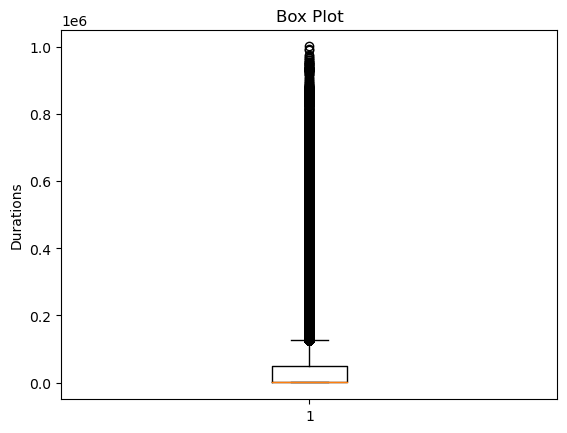

In [166]:
plt.boxplot(dwell_df['duration'])
plt.title('Box Plot')
plt.ylabel('Durations')
plt.show()

In [167]:
dwell_df.size

2127250

In [168]:
df['user_id'].value_counts()

435771D7-6329-4664-8C4A-C1366A1CDDB0    3430
1f1e1735-9e08-4981-b83f-6f910622f982    1670
57e5b56c-18bc-4f50-a66b-f9f625ea3b64    1391
2051c18f-d6a7-41f4-96bb-1659f2f8ef4f    1244
39fc7ed0-8f1b-43ee-9837-1a6ed1a011ff    1221
                                        ... 
3FF65AA3-56DD-49FB-8012-5D1BC41DFDCF      20
78f5755e-65f5-443b-b580-44f617b460e7      20
10623309-43D6-4618-8AE5-221A37857D7A      20
F22B9BEB-A3CD-4128-B207-DD4073DAE9E5      20
E26071B9-E569-4B7E-8871-7DBDDFEF1007      20
Name: user_id, Length: 31606, dtype: int64

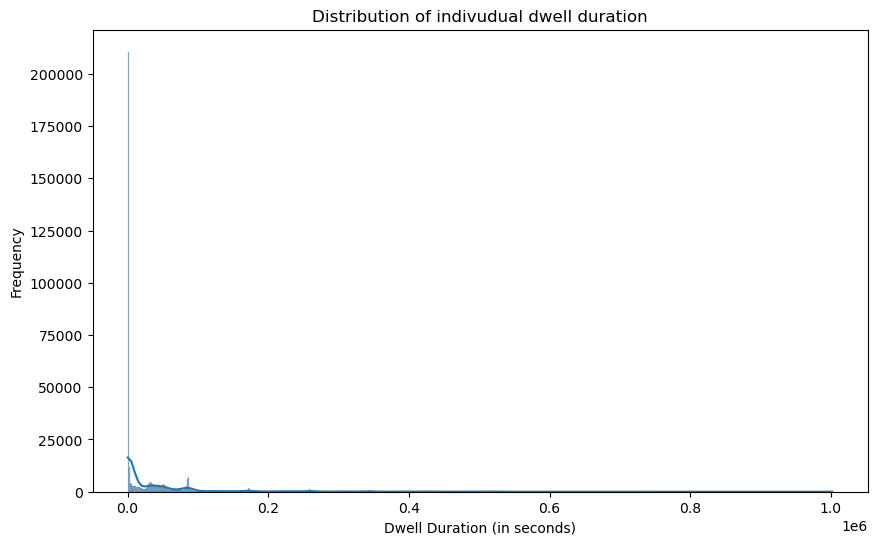

In [169]:
plt.figure(figsize=(10, 6))
sns.histplot(dwell_df['duration'], kde=True)  # `kde` adds a Kernel Density Estimate plot
plt.title('Distribution of indivudual dwell duration')
plt.xlabel('Dwell Duration (in seconds)')
plt.ylabel('Frequency')
plt.show()